In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [2]:
dataset =  pd.read_csv('suv_data.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.shape

(400, 5)

In [5]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})

In [9]:
X=dataset.iloc[:,[2,3]]
y=dataset.iloc[:,4]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_test.shape, X_train.shape,y_train.shape,y_test.shape

((80, 2), (320, 2), (320,), (80,))

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [14]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [16]:
model =  model.fit(X_train,y_train)
train_y_pred = model.predict(X_train)

In [17]:
test_y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print("Train accuracy : ",accuracy_score(train_y_pred,y_train))
print("Test Accuracy : ", accuracy_score(test_y_pred,y_test))

Train accuracy :  0.840625
Test Accuracy :  0.8625


In [23]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,test_y_pred)
cf

array([[50,  2],
       [ 9, 19]], dtype=int64)

<Axes: >

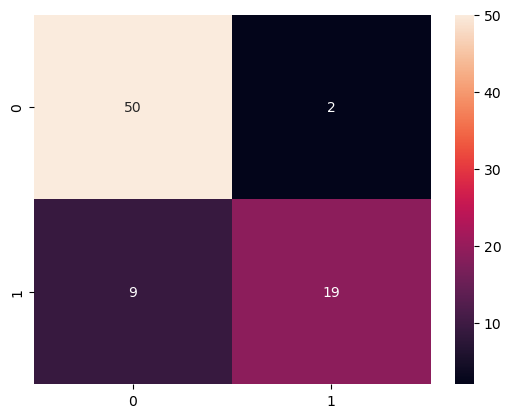

In [22]:
import seaborn as sns
sns.heatmap(cf,annot=True)
